# Importing Dependencies

### Instance Segmentation of Powder Particles and Satellites

This example is used to generate a visualization of an individual image


In [26]:
## regular module imports
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import pickle
import skimage.io
import sys

## detectron2
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.data import (
    DatasetCatalog,
    MetadataCatalog,
)
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.structures import BoxMode

## Setting System Path

In [27]:
## ampis
ampis_root = Path('../../../')
sys.path.append(str(ampis_root))

from ampis import data_utils, visualize

In [56]:
EXPERIMENT_NAME = 'particle' # can be 'particle' or 'satellite'
cfg = get_cfg() # initialize cfg object
cfg.merge_from_file(model_zoo.get_config_file('COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml'))  # load default parameters for Mask R-CNN
cfg.INPUT.MASK_FORMAT = 'polygon'  # masks generated in VGG image annotator are polygons
cfg.MODEL.DEVICE='cuda'  # 'cpu' to force model to run on cpu, 'cuda' if you have a compatible gpu
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1 # Since we are training separate models for particles and satellites there is only one class output
cfg.OUTPUT_DIR = str(Path('..', f'{EXPERIMENT_NAME}_output'))
# make the output directory
os.makedirs(Path(cfg.OUTPUT_DIR), exist_ok=True)
cfg.TEST.DETECTIONS_PER_IMAGE = 400 if EXPERIMENT_NAME == 'particle' else 150  # maximum number of instances that can be detected in an image (this is fixed in mask r-cnn)
model_checkpoints = sorted(Path(cfg.OUTPUT_DIR).glob('*.pth'))  # paths to weights saved druing training
#cfg.DATASETS.TEST = (dataset_train, dataset_valid)  # predictor requires this field to not be empty
cfg.MODEL.WEIGHTS = str(model_checkpoints[-1])  # use the last model checkpoint saved during training. If you want to see the performance of other checkpoints you can select a different index from model_checkpoints.
predictor = DefaultPredictor(cfg)  # create predictor object

### Importing image and visualizing


-------------------Print Tests----------------


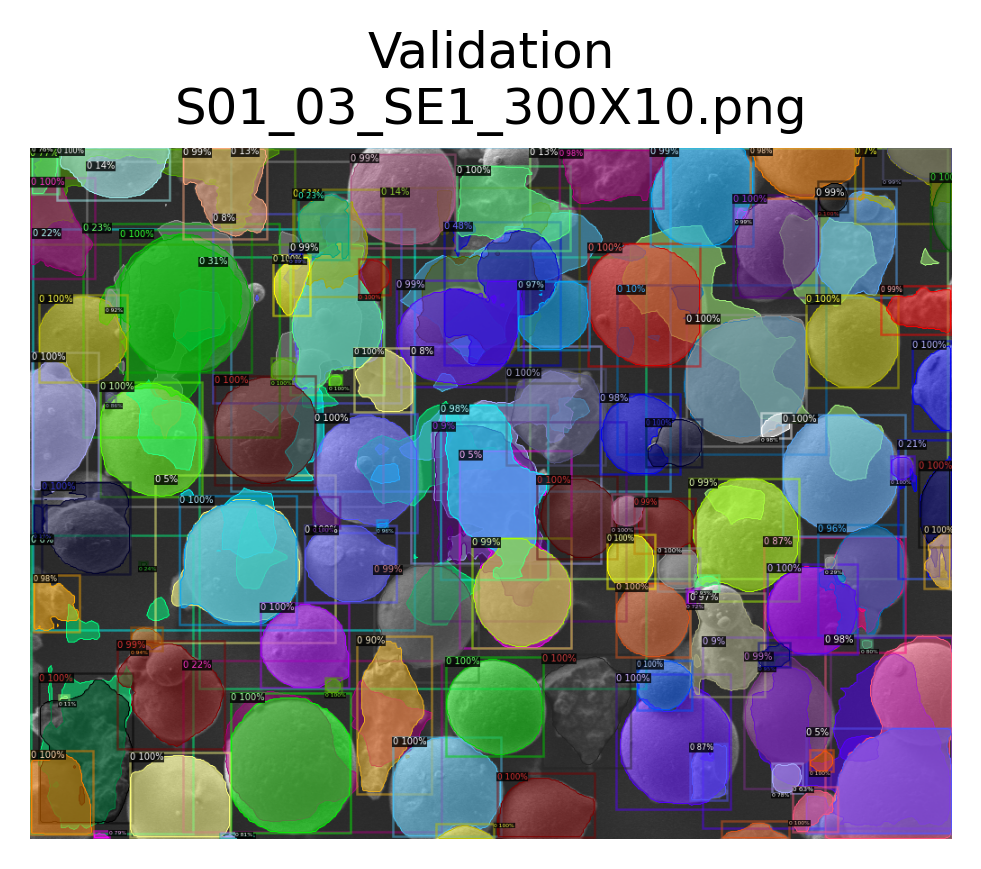

ddict info:
	path: ../data/images_png/S01_03_SE1_300X10.png
	num_instances: 122


In [57]:
print("-------------------Print Tests----------------")
#img_path = Path('..', 'data','images_png','Sc2Tile_010-006-000_0-000.png') #CMU Particle Validation
img_path = Path('..', 'data','images_png','S01_03_SE1_300X10.png') #WPI Particle Validation
#img_path = Path('..', 'data','images_png','Sc2Tile_010-006-000_0-000.png') #CMU Satellite Validation
#img_path = Path('..', 'data','images_png','S02_01_SE1_500X15.png') #WPI Satellite Validation
img = cv2.imread(str(img_path))
outs = predictor(img)
data_utils.format_outputs(img_path, dataset='Validation', pred=outs)
visualize.display_ddicts(ddict=outs,  # predictions to display
                                 outpath=None, dataset='Validation',  # don't save figure
                                 gt=False,  # specifies format as model predictions
                                img_path=img_path)  # path to image

### Testing Again
Analyzing the same image with a the initial model made

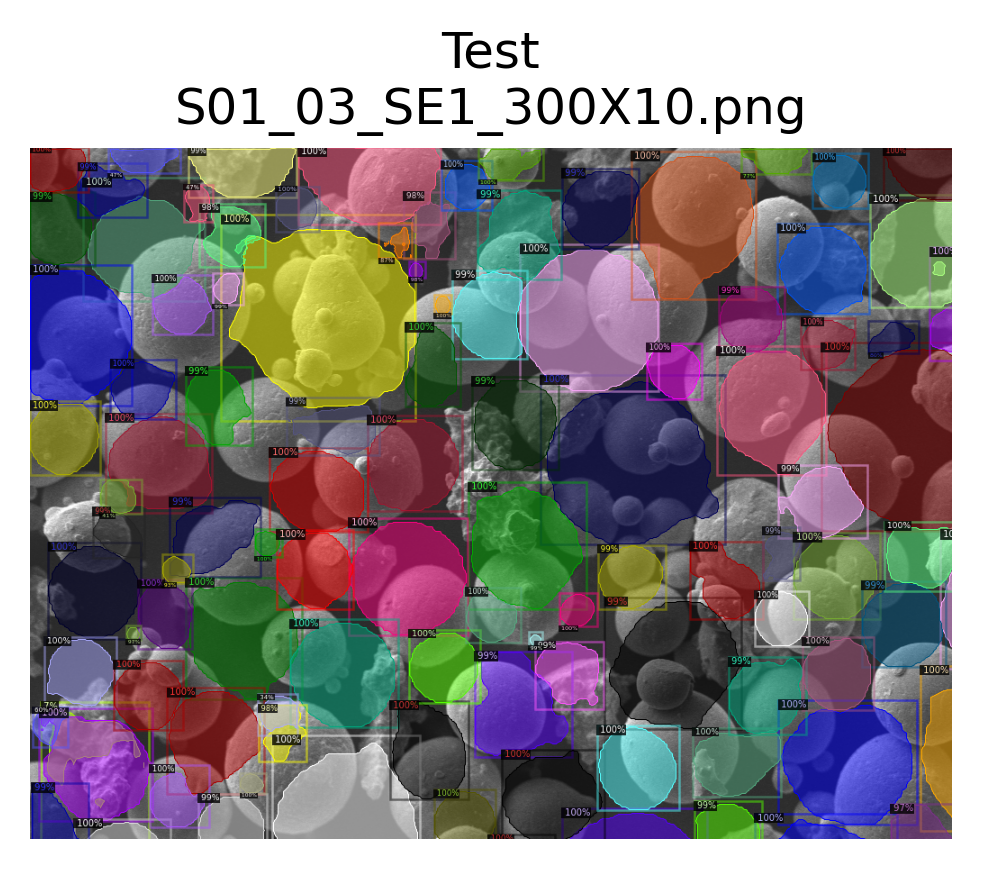

In [13]:
#------------------------------------
img_path = Path('..', 'data','images_png','S01_03_SE1_300X10.png')
predictor = DefaultPredictor(cfg)  # create predictor object
outs = predictor(img)
data_utils.format_outputs(img_path, dataset='test', pred=outs)
#print(outs['instances'])#['pred-masks'])
visualize.display_ddicts(ddict=outs,  # predictions to display
                                 outpath=None, dataset='Test',  # don't save fi$
                                 gt=False,  # specifies format as model predict$
                                 img_path=img_path, # path to image
                                 suppress_labels=True, #hides class images
                                 summary=False)  #hides the end print statement